Connected to Python 3.10.0

In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 2s 0us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))

('Testing data shape : ', (10000, 28, 28), (10000,))

In [4]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [6]:
('Total number of outputs : ', 10)
('Output classes : ', np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=np.uint8))

('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Text(0.5, 1.0, 'Ground Truth : 9')

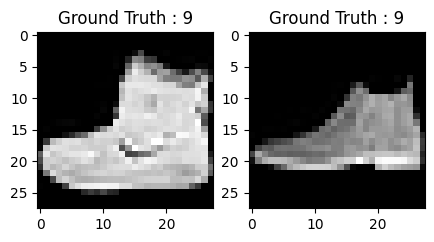

In [7]:
plt.figure(figsize=[5,5])
# Display the first image in training data

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))
# Display the first image in testing data

plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [8]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [10]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
# Display the change for category label using one-hot encoding

print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.4 kB 1.4 MB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.4 kB 219.0 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 230.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.3 MB 1.4 MB/s eta 0:00:07
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
   ---------------------------------------- 0.1/9.3 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.1/9.3 MB 607.9 kB/s eta 0:00:15
    

In [13]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [19]:
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [20]:
batch_size = 64
epochs = 20
num_classes = 10

In [21]:
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU

In [22]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [23]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [24]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                   

In [25]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20


750/750 [==============================] - 18s 22ms/step - loss: 0.4727 - accuracy: 0.8276 - val_loss: 0.3332 - val_accuracy: 0.8823
Epoch 2/20
750/750 [==============================] - 18s 24ms/step - loss: 0.2904 - accuracy: 0.8942 - val_loss: 0.2843 - val_accuracy: 0.8998
Epoch 3/20
750/750 [==============================] - 25s 33ms/step - loss: 0.2425 - accuracy: 0.9106 - val_loss: 0.2405 - val_accuracy: 0.9132
Epoch 4/20
750/750 [==============================] - 25s 33ms/step - loss: 0.2088 - accuracy: 0.9223 - val_loss: 0.2362 - val_accuracy: 0.9175
Epoch 5/20
750/750 [==============================] - 25s 33ms/step - loss: 0.1869 - accuracy: 0.9304 - val_loss: 0.2245 - val_accuracy: 0.9218
Epoch 6/20
750/750 [==============================] - 25s 33ms/step - loss: 0.1627 - accuracy: 0.9403 - val_loss: 0.2549 - val_accuracy: 0.9089
Epoch 7/20
750/750 [==============================] - 25s 34ms/step - loss: 0.1405 - accuracy: 0.9471 - val_loss: 0.2450 - val_accurac

In [26]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.49351435899734497
Test accuracy: 0.9182999730110168


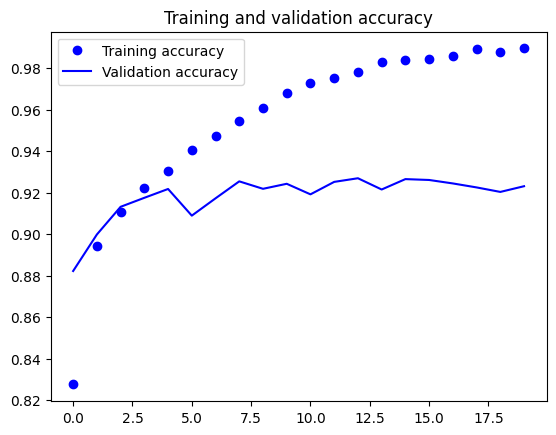

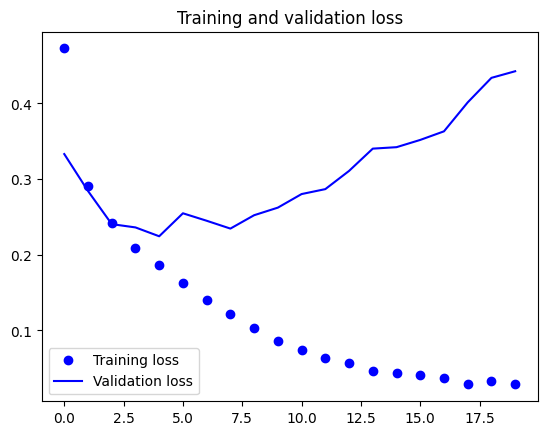

In [28]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
batch_size = 64
epochs = 20
num_classes = 10

In [30]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [31]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 24s 30ms/step - loss: 0.6059 - accuracy: 0.7778 - val_loss: 0.3738 - val_accuracy: 0.8591
Epoch 2/20
750/750 [==============================] - 23s 30ms/step - loss: 0.3775 - accuracy: 0.8607 - val_loss: 0.3099 - val_accuracy: 0.8875
Epoch 3/20
750/750 [==============================] - 23s 30ms/step - loss: 0.3307 - accuracy: 0.8780 - val_loss: 0.2787 - val_accuracy: 0.8967
Epoch 4/20
750/750 [==============================] - 23s 31ms/step - loss: 0.3010 - accuracy: 0.8882 - val_loss: 0.2681 - val_accuracy: 0.9013
Epoch 5/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2828 - accuracy: 0.8966 - val_loss: 0.2513 - val_accuracy: 0.9078
Epoch 6/20
750/750 [==============================] - 23s 31ms/step - loss: 0.2669 - accuracy: 0.9007 - val_loss: 0.2389 - val_accuracy: 0.9113
Epoch 7/20
750/750 [==============================] - 24s 32ms/step - loss: 0.2597 - accuracy: 0.9036 - val_loss: 0.2293 - val_accuracy:

In [32]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


INFO:tensorflow:Assets written to: fashion_model_dropout.h5py\assets


In [33]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2139 - accuracy: 0.9224
Test loss: 0.21385549008846283
Test accuracy: 0.9223999977111816


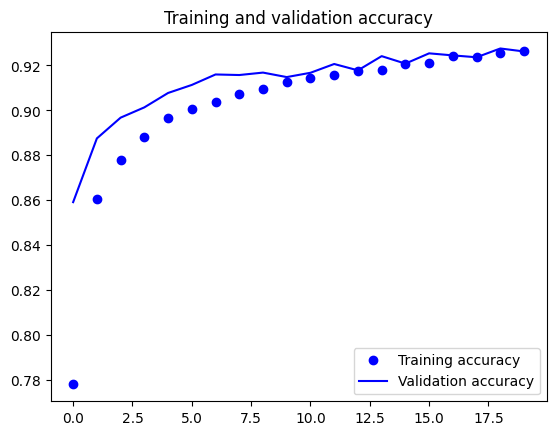

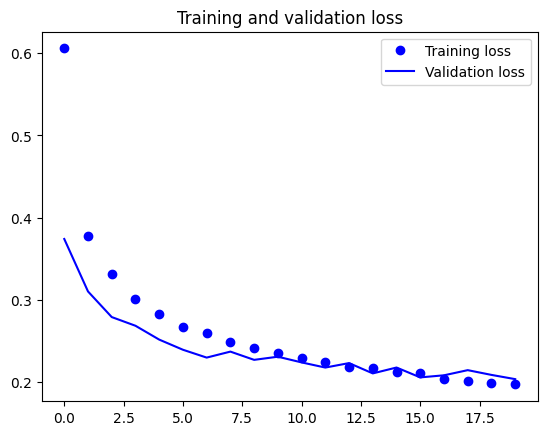

In [34]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [35]:
predicted_classes = fashion_model.predict(test_X)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
predicted_classes.shape, test_Y.shape

313/313 [==============================] - 2s 6ms/step


((10000,), (10000,))

Found 9211 correct labels


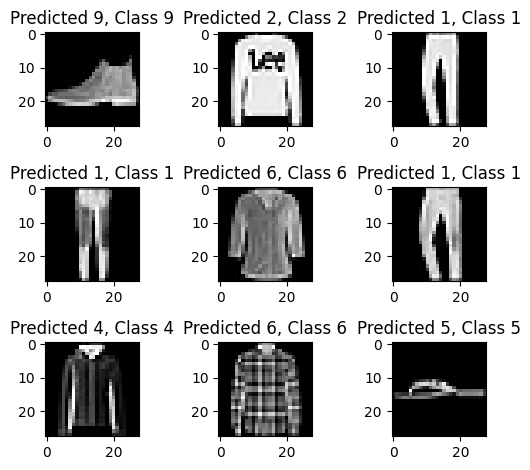

In [37]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 789 incorrect labels


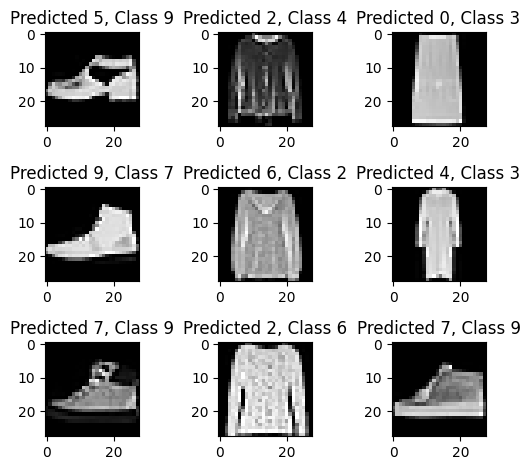

In [38]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [39]:
from sklearn.metrics import classification_report

In [40]:
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.91      0.85      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.87      0.90      0.88      1000
     Class 3       0.93      0.93      0.93      1000
     Class 4       0.88      0.88      0.88      1000
     Class 5       0.99      0.98      0.99      1000
     Class 6       0.84      0.70      0.76      1000
     Class 7       0.96      0.97      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

